In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch import nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models

In [6]:
from torch.autograd import Variable
import torch.utils.data as data
import pandas as pd
import os
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset

In [7]:
# paths for (labeled) training & validation data.
train_path = '/content/drive/MyDrive/FashionClassification/Train/'
valid_path = '/content/drive/MyDrive/FashionClassification/Validation/'

In [8]:
# prepare training data set
classes = ['Resort', 'Retro', 'Sporty']

data =[]
label =[]

## i : Integer representation for each classes (Resort/Retro/Sporty -> 0/1/2)
for i, d in enumerate(classes):
    files = os.listdir(train_path+'/'+d)
    
    for f in files:
        img = Image.open(train_path+'/'+d+'/'+f,'r')
        img = img.resize((150, 150))
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)

data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

train_X = torch.from_numpy(data) #numpy to tensor
train_Y = torch.from_numpy(label)

train_X = train_X.type(torch.cuda.FloatTensor) #32bit
train_Y = train_Y.type(torch.cuda.LongTensor) #For CrossEntropy Loss

train_dataset = TensorDataset(train_X,train_Y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [9]:
data.shape, label.shape  # check

((7200, 3, 150, 150), (7200,))

In [10]:
# prepare validation data set
data =[]
label =[]

for i, d in enumerate(classes):
    files = os.listdir(valid_path+'/'+d)
    
    for f in files:
        img = Image.open(valid_path+'/'+d+'/'+f,'r')
        img = img.resize((150, 150))
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1)) # (150,150,3) --> (3,150,150)
        label.append(i)
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

valid_X = torch.from_numpy(data)
valid_Y = torch.from_numpy(label)

valid_X = valid_X.type(torch.cuda.FloatTensor)
valid_Y = valid_Y.type(torch.cuda.LongTensor)

valid_dataset = TensorDataset(valid_X,valid_Y)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [11]:
data.shape, label.shape  # check

((1800, 3, 150, 150), (1800,))

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


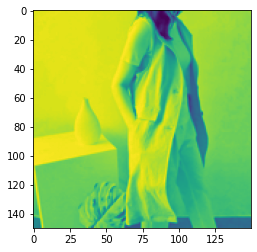

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


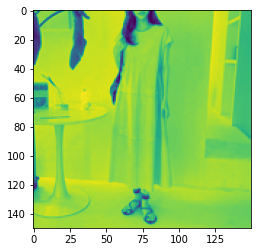

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


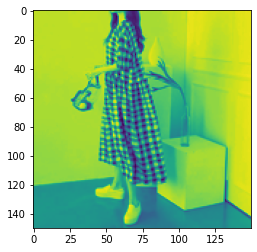

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


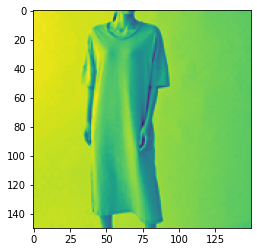

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


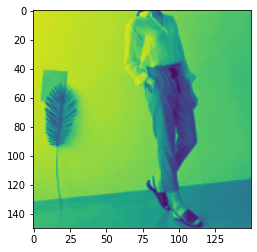

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


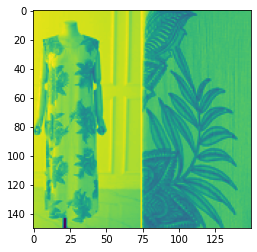

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


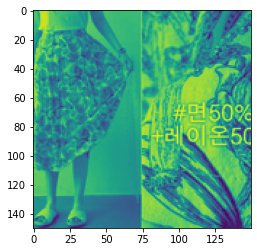

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


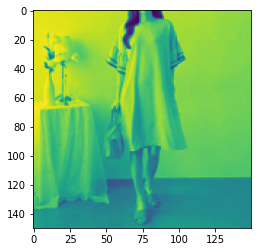

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


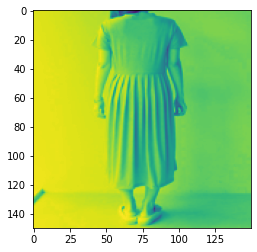

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


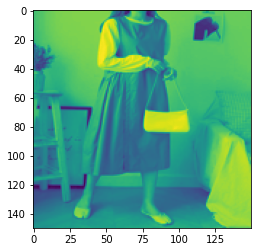

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


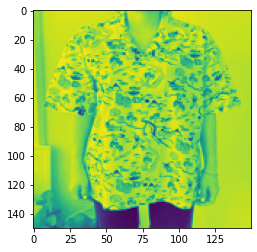

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


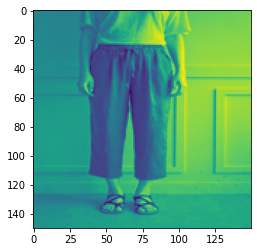

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


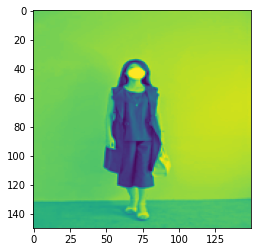

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


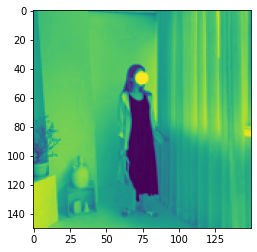

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


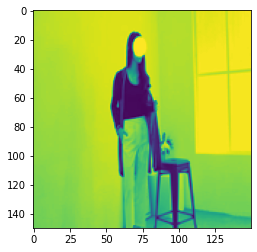

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


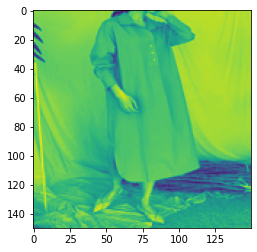

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


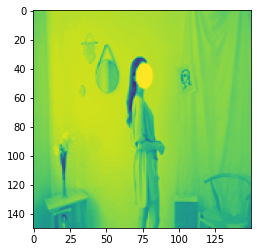

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


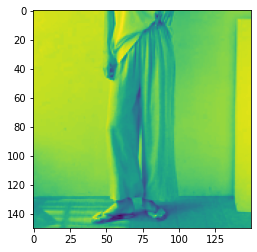

torch.Size([32, 3, 150, 150])
Label = 0 : Resort


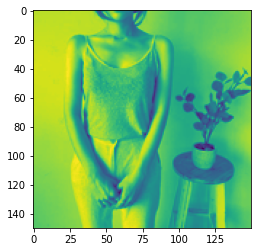

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


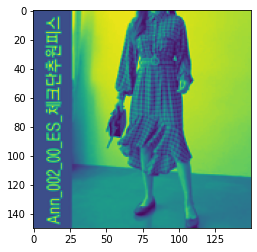

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


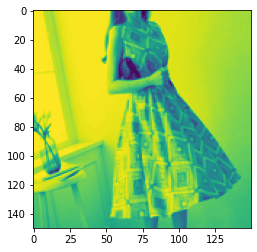

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


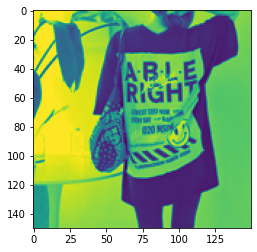

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


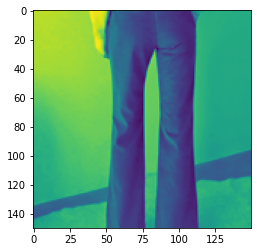

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


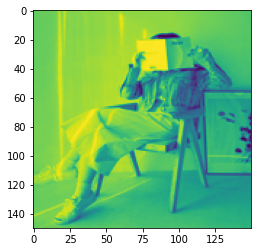

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


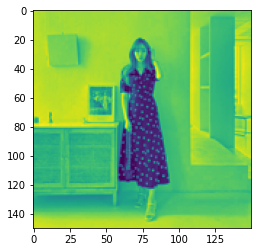

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


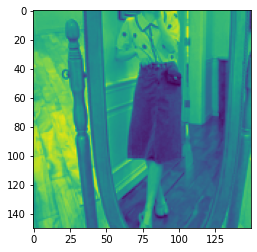

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


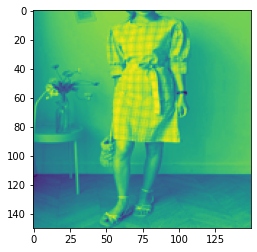

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


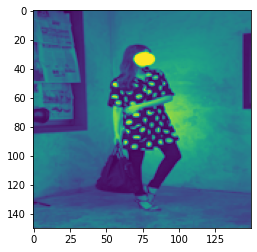

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


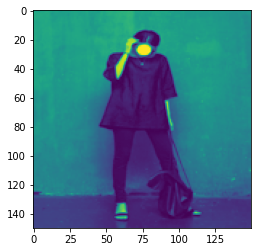

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


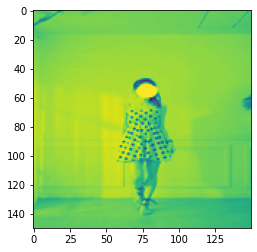

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


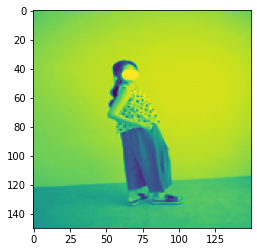

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


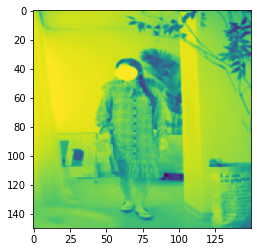

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


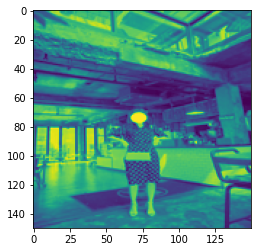

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


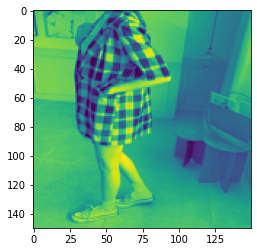

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


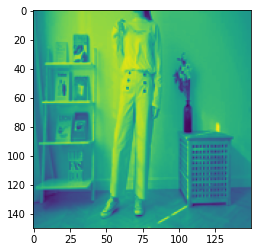

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


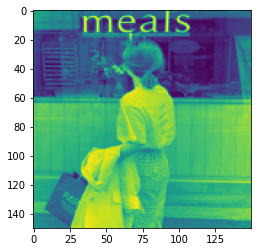

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


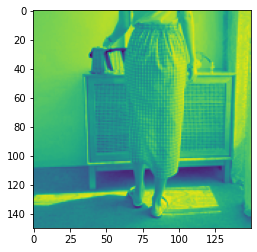

torch.Size([32, 3, 150, 150])
Label = 1 : Retro


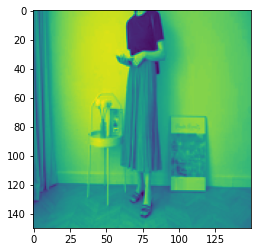

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


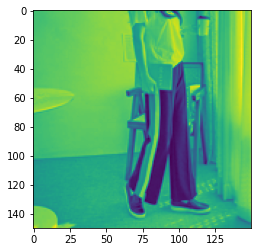

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


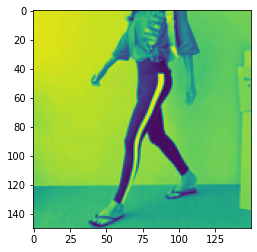

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


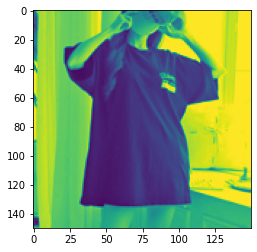

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


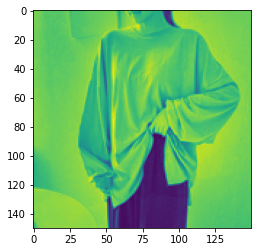

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


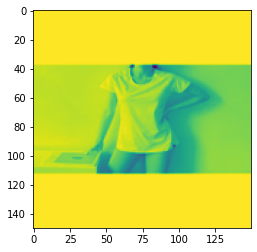

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


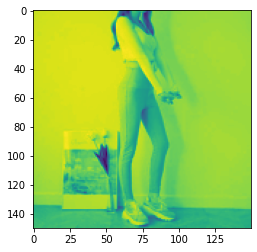

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


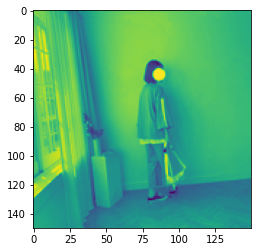

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


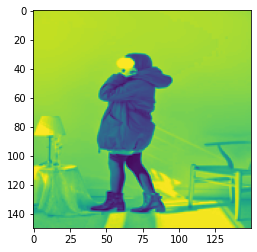

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


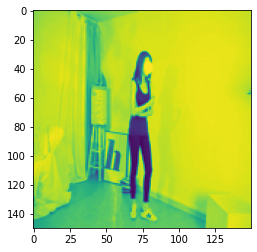

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


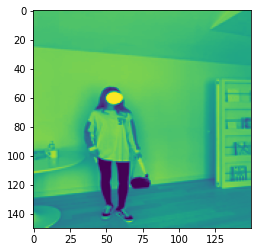

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


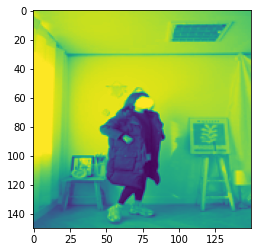

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


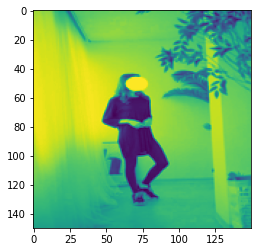

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


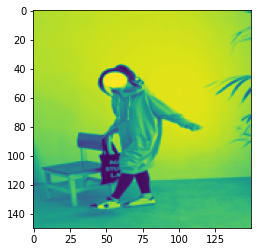

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


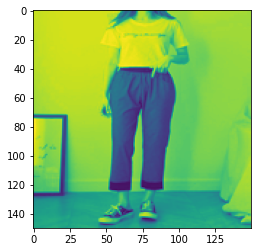

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


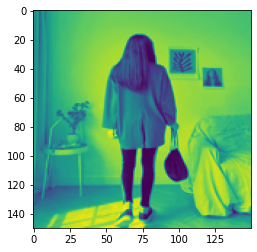

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


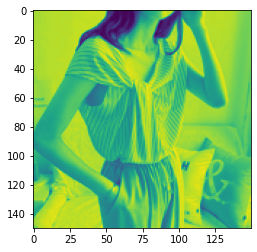

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


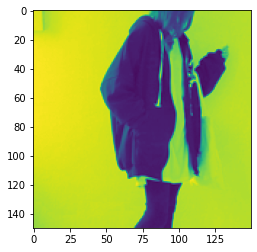

torch.Size([32, 3, 150, 150])
Label = 2 : Sporty


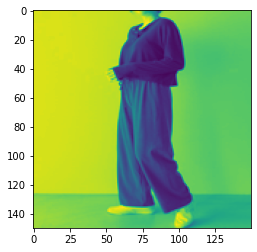

torch.Size([8, 3, 150, 150])
Label = 2 : Sporty


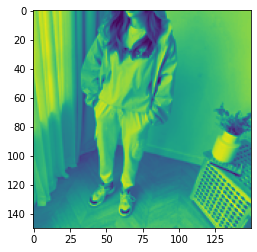

In [ ]:
# Display images
# Not necessary for training. Just for confirmation
for images, labels in valid_loader:
        i, l = Variable(images), Variable(labels)
        print(i.size())
        i = i.cpu().numpy()
        l = l.cpu().numpy()
        print(f'Label = {l[0]} : {classes[l[0]]}')
        plt.imshow(i[0,0,:,:])
        plt.show()

In [ ]:
# Build convolutional neural net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
        )
        
        self.fc = nn.Linear(2048,3)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x


model = Net()

In [ ]:
# Print the network you built
model.cuda()

Net(
  (conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (16): ReLU()
    (17): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (18): ReLU()
    (19): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_fea

In [ ]:
# training
def run_train(model):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        train_img = inputs.cpu().numpy()
        
    return train_img, pred, truth, accuracy, total_loss

In [ ]:
# Validation
def run_valid(model):
    model.eval()
    criterion = nn.CrossEntropyLoss()
   # optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in valid_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        #optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        print('Valid_Prediction : {}'.format(pred))
        print('Valid_Truth : {}'.format(truth))
        
        loss = criterion(output, labels)
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        valid_img = inputs.cpu().numpy()
        
    return valid_img, pred, truth, accuracy, total_loss

***START EPOCH***
# Epoch : 0 /60
Valid_Prediction : [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 1 1 1 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 2 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 1 0 0 0 2 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 1 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 0 2 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

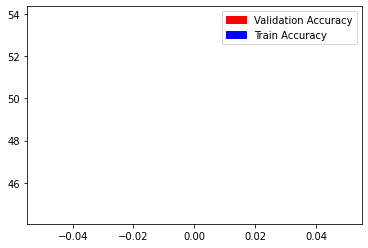

# Epoch : 1 /60
Valid_Prediction : [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 1 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 2 0 2 0 2 2 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 1 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 1 0 1 0 0 0 0 1 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

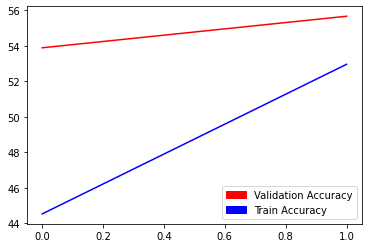

# Epoch : 2 /60
Valid_Prediction : [0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 1 1 2 0 2 0 0 2 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 2 0 2 0 2 0 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 0 0 2 1 0 2 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

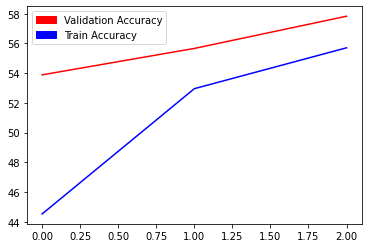

# Epoch : 3 /60
Valid_Prediction : [0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 1 1 1 2 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0 1 2 0 2 0 0 2 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 2 0 2 0 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 0 2 0 2 2 0 0 2 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 2 0 2 2 1 0 2 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0 2 2 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

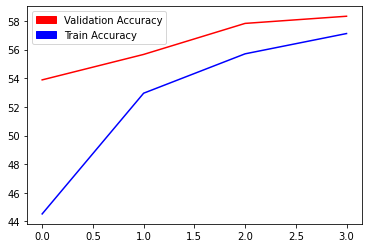

# Epoch : 4 /60
Valid_Prediction : [0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 2 0 2 0 0 0 0 2 0 0 0 1 1 0 2 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 2 0 2 2 1 0 2 0 2 0 1 0 0 1 0 0 1 0 0 0 2 2 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

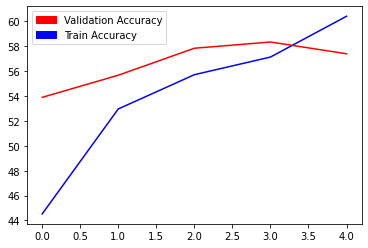

# Epoch : 5 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 2 0 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

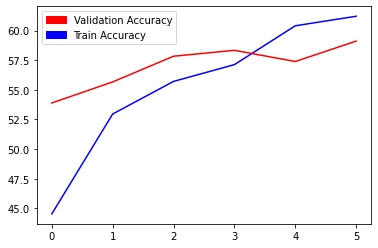

# Epoch : 6 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 2 0 2 0 0 0 0 0 2 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 2 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 0 0 0 1 2 0 0 2 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 1 2 2 1 0 0 0 2 0 1 0 0 1 0 0 1 0 0 2 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

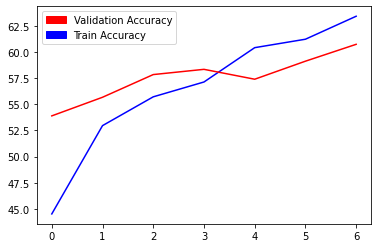

# Epoch : 7 /60
Valid_Prediction : [0 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 2 1 1 1 2 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 0 2 0 2 0 2 2 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 0 0 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 1 2 2 1 2 2 0 2 0 1 0 0 1 0 0 1 0 0 2 2 2 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

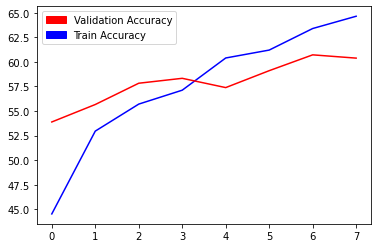

# Epoch : 8 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 2 1 1 1 2 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 1 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 1 0 2 0 2 0 0 0 0 0 2 2 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 2 0 0 1 0 2 0 0 0 1 1 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 0 0 2 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 2 1 2 2 1 0 2 0 2 0 1 0 0 1 0 2 1 0 0 2 0 2 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

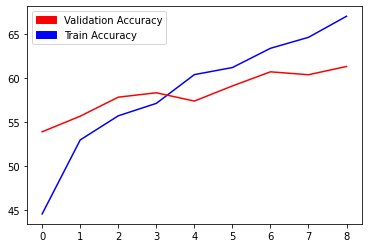

# Epoch : 9 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 1 1 0 1 2 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 2 0 2 0 2 2 0 1 1 1 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 0 0 2 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 0 0 1 2 1 1 0 0 0 2 1 1 0 0 1 0 0 1 0 0 2 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

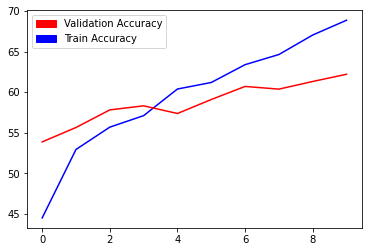

# Epoch : 10 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 0 0 1 1 1 1 2 0 0 1 0 0 0 2 0 0 0 2 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 1 1 2 0 2 0 2 0 0 1 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 2 0 0 1 0 2 0 0 1 0 0 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 2 0 1 2 0 0 2 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 2 1 2 1 0 0 2 0 2 1 1 1 0 1 0 0 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

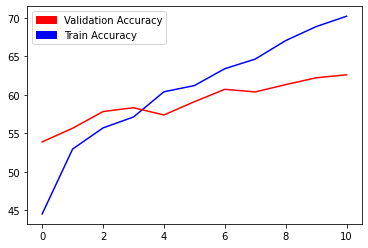

# Epoch : 11 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 0 2 0 2 2 0 0 2 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 0 2 1 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 2 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 2 1 0 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

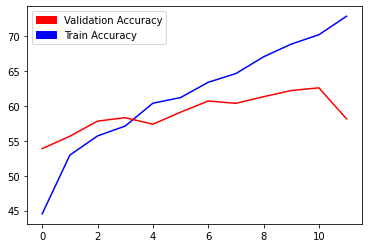

# Epoch : 12 /60
Valid_Prediction : [1 1 0 2 2 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 1 2 0 0 0 0 1 1 1 1 2 0 0 1 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 2 0 0 2 2 0 2 2 2 2 0 1 1 2 0 2 0 0 0 0 1 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 0 2 0 0 1 0 1 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 2 0 1 2 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 0 0 0 1 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 1 0 1 0 1 2 1 2 0 0 0 2 0 1 1 0 1 0 2 1 0 0 2 2 0 1 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

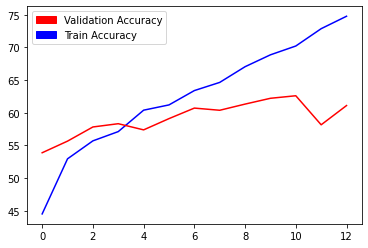

# Epoch : 13 /60
Valid_Prediction : [0 1 1 2 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 1 1 2 0 2 0 0 0 0 1 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 1 0 0 0 0 1 0 1 0 2 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 1 0 0 1 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 1 0 1 2 1 0 0 0 0 2 0 1 1 0 1 0 0 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

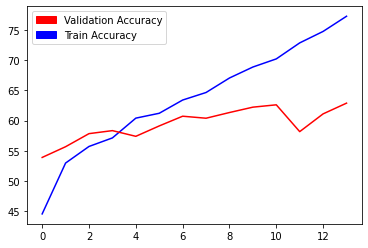

# Epoch : 14 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 1 0 2 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 0 2 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 0 0 0 0 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 2 2 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

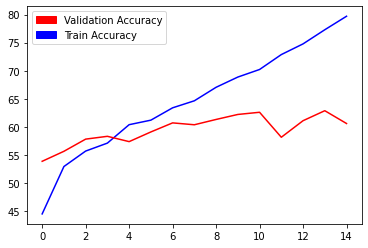

# Epoch : 15 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 2 0 0 0 0 2 1 1 1 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 1 0 2 0 2 0 0 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 0 1 2 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 2 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 0 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 1 0 1 0 1 0 2 2 0 2 0 0 0 0 1 0 2 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

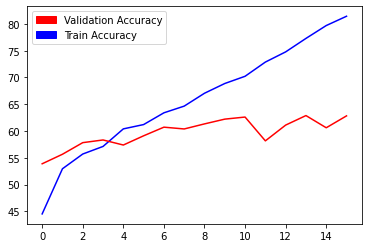

# Epoch : 16 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 2 0 1 1 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 1 0 0 0 0 0 0 2 0 0 2 0 1 0 2 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 1 0 1 0 2 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

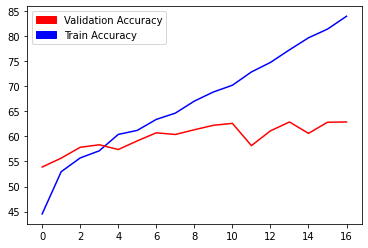

# Epoch : 17 /60
Valid_Prediction : [1 1 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 1 0 0 0 2 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 0 0 0 1 0 0 0 0 2 0 0 2 0 1 1 2 0 2 0 0 0 0 1 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 1 0 2 1 0 2 0 0 0 1 0 2 0 0 2 0 2 0 0 0 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 1 0 0 0 1 0 2 1 0 0 2 2 0 1 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

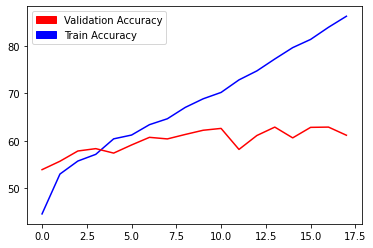

# Epoch : 18 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 2 0 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 0 0 0 0 2 0 0 2 0 1 0 2 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 0 0 0 1 0 2 0 0 2 0 2 0 0 0 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

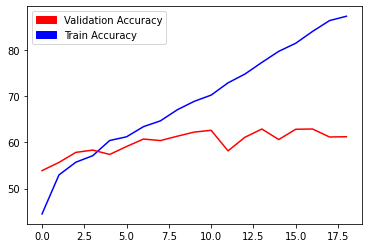

# Epoch : 19 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 1 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 1 1 1 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 0 2 1 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 1 2 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 2 2 0 1 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

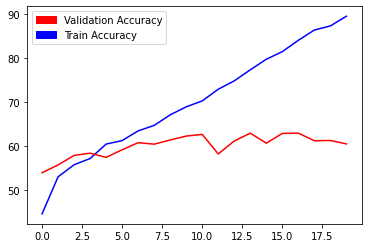

# Epoch : 20 /60
Valid_Prediction : [1 1 0 2 0 0 0 0 0 2 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 1 1 0 0 0 0 1 1 0 1 0 1 2 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 1 1 1 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 2 1 0 0 0 2 0 1 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

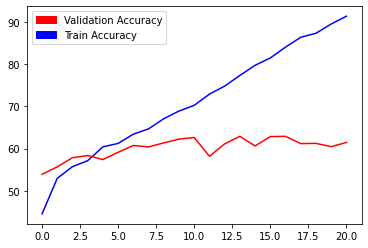

# Epoch : 21 /60
Valid_Prediction : [1 1 0 2 2 0 0 0 0 2 0 0 1 0 0 0 2 0 2 0 0 2 2 1 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 1 0 0 2 0 1 1 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 0 0 2 2 0 2 0 1 0 1 0 2 0 0 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 0 2 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 0 2 2 0 2 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 1 0 0 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

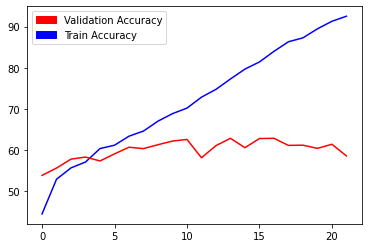

# Epoch : 22 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 2 0 0 1 1 0 0 2 0 0 0 0 2 0 1 0 0 0 2 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 2 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 2 0 0 0 0 0 2 2 0 2 0 1 0 2 0 2 2 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 1 0 2 0 0 0 0 2 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 2 1 2 2 0 2 0 0 0 1 0 2 2 0 2 2 0 2 0 2 0 1 2 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 2 2 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

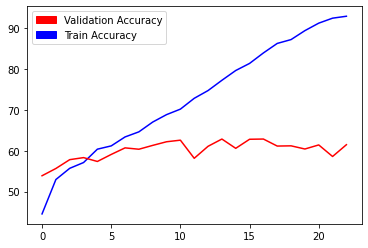

# Epoch : 23 /60
Valid_Prediction : [0 1 0 2 2 0 2 0 0 2 0 0 1 1 0 0 2 2 1 0 0 2 0 1 0 0 0 2 0 2 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 2 0 1 0 0 0 0 1 2 1 2 0 0 2 0 0 1 2 2 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 2 0 2 2 0 0 2 2 2 2 0 1 2 2 0 2 2 2 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 2 0 2 2 0 0 1 2 2 2 0 2 0 2 2 0 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 1 2 2 1 0 0 2 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

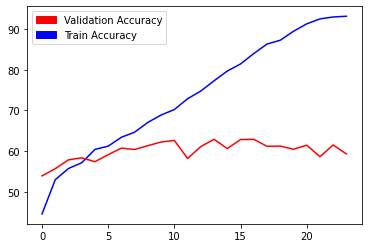

# Epoch : 24 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 2 0 0 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

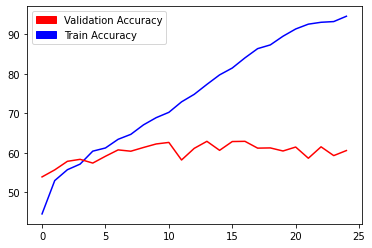

# Epoch : 25 /60
Valid_Prediction : [0 1 0 2 2 0 1 0 0 2 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 2 0 1 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 2 0 0 2 0 1 1 1 1 0 1 2 1 0 0 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 2 0 0 2 0 0 2 2 2 2 0 1 0 1 0 2 2 0 0 0 1 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 1 2 2 0 0 0 0 2 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 2 0 2 0 0 0 1 0 0 2 0 2 0 2 0 0 2 0 0 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 1 0 2 2 2 0 0 1 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

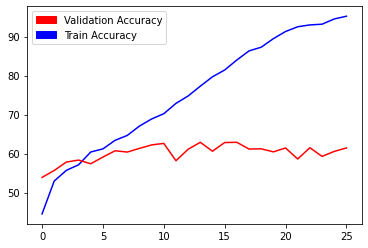

# Epoch : 26 /60
Valid_Prediction : [1 1 0 2 2 0 2 0 0 2 2 0 1 1 0 0 2 2 2 0 0 2 2 1 0 0 0 0 2 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 2 2 0 0 2 0 1 0 0 1 0 0 2 1 0 0 0 1 0 0 1 0 2 1 1 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 2 0 2 0 2 0 2 2 2 2 0 1 2 1 0 2 2 0 0 0 2 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 2 2 2 1 0 0 0 2 0 1 2 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 2 0 2 2 0 0 1 2 2 2 0 2 2 2 2 0 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 2 2 0 2 0 0 2 1 0 0 0 1 2 2 1 0 0 2 2 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

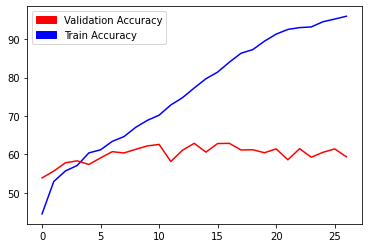

# Epoch : 27 /60
Valid_Prediction : [1 1 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 1 0 1 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 1 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 2 1 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

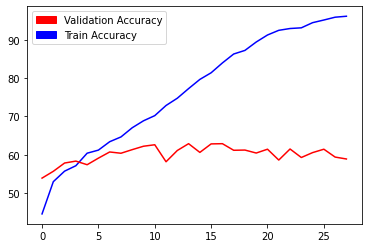

# Epoch : 28 /60
Valid_Prediction : [1 1 0 2 2 0 1 0 0 0 0 0 1 1 0 0 2 2 0 0 0 1 0 1 1 0 1 1 1 2 2 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 2 0 0 2 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 2 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 0 2 0 0 2 2 2 2 1 1 0 1 0 2 2 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 2 0 0 1 0 0 0 2 0 0 0 0 2 0 1 0 0 2 2 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 2 0 2 2 0 0 1 0 0 0 0 2 0 0 2 1 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 1 0 0 0 1 0 2 1 0 0 2 2 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

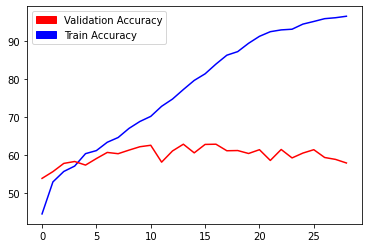

# Epoch : 29 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 2 0 0 2 1 1 1 1 1 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 2 0 0 2 0 0 2 2 2 2 0 1 1 1 0 2 0 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 0 0 0 1 2 2 0 2 2 0 0 1 0 0 0 0 2 0 0 0 0 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

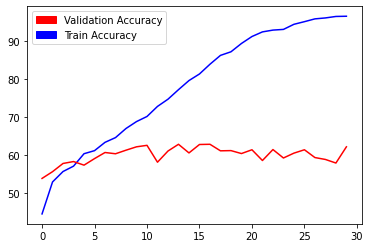

# Epoch : 30 /60
Valid_Prediction : [0 1 0 2 0 0 2 0 0 2 0 0 1 1 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 0 0 0 2 2 0 2 0 1 0 1 0 2 2 0 0 0 0 2 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 0 0 0 1 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

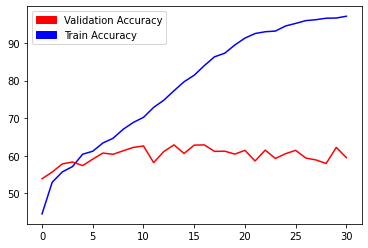

# Epoch : 31 /60
Valid_Prediction : [1 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 2 0 1 0 0 2 0 1 0 0 0 1 1 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 0 0 1 1 0 1 0 0 2 1 0 0 0 1 0 0 0 0 2 1 0 0 2 0 1 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 2 2 0 0 2 2 2 2 2 1 0 2 0 2 0 0 0 0 0 2 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 0 0 2 1 0 0 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 2 0 2 0 0 0 1 2 2 2 0 2 0 2 0 0 2 0 1 2 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

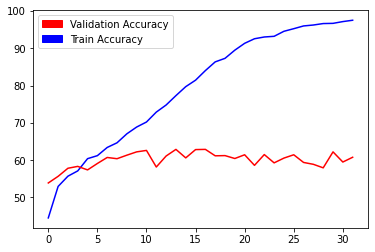

# Epoch : 32 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 2 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 1 1 2 0 2 0 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 1 2 0 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

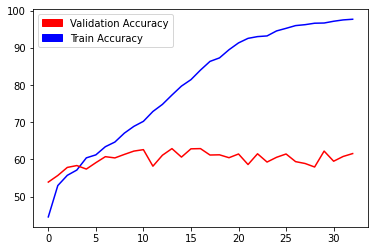

# Epoch : 33 /60
Valid_Prediction : [0 1 0 2 2 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 2 1 0 0 1 1 1 2 2 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 2 0 0 0 0 1 1 1 1 0 1 2 1 0 0 1 1 0 0 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 1 2 0 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 0 0 2 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 2 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 1 0 1 1 2 1 0 2 2 0 0 1 0 2 0 0 0 0 0 0 0 2 0 1 1 2 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 2 0 0 0 1 0 0 0 1 0 2 1 0 0 2 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

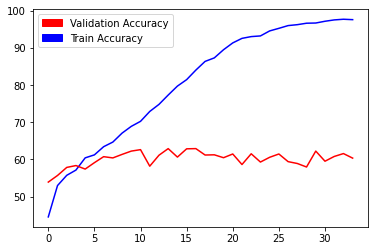

# Epoch : 34 /60
Valid_Prediction : [0 1 0 2 2 0 0 0 0 2 0 0 1 1 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 2 2 2 1 2 2 0 2 2 0 0 0 0 2 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 2 0 2 0 0 0 1 2 2 2 0 2 0 0 2 0 2 0 1 0 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 1 0 2 0 0 0 2 2 0 1 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

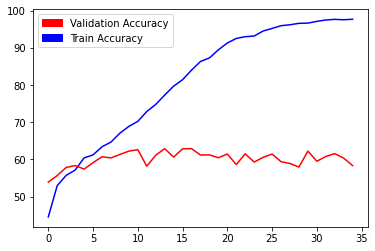

# Epoch : 35 /60
Valid_Prediction : [1 1 0 2 2 0 1 0 0 2 0 0 1 1 0 0 2 0 1 0 0 1 0 1 1 0 1 0 1 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 2 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 2 1 0 2 0 0 2 2 0 2 2 1 1 1 0 2 2 0 0 0 0 2 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 1 2 2 0 0 1 0 0 0 2 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 2 0 2 0 0 0 1 0 0 2 0 2 0 0 0 0 2 0 1 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 2 0 1 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

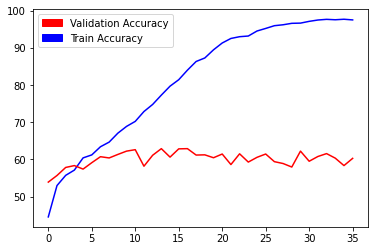

# Epoch : 36 /60
Valid_Prediction : [1 1 0 2 0 0 0 2 0 0 0 0 1 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 2 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 0 0 2 0 0 0 0 1 2 0 0 0 0 2 0 0 0 0 0 1 1 0 0 2 1 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 2 2 0 0 2 2 2 2 2 1 2 2 0 2 2 0 0 2 0 2 1 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 2 0 0 2 2 2 0 0 0 0 0 1 2 0 2 2 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 2 1 2 2 0 2 2 0 0 1 0 2 2 0 2 0 0 2 0 2 0 1 2 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 0 0 1 2 2 1 0 2 2 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

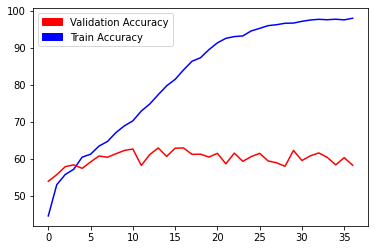

# Epoch : 37 /60
Valid_Prediction : [1 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 0 0 1 1 0 1 0 1 2 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 2 0 0 2 2 2 2 0 1 2 1 0 2 2 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 0 2 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 0 2 0 2 0 0 0 1 0 0 2 0 2 0 2 0 0 2 0 1 0 2 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 1 0 2 1 0 0 0 0 0 1 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

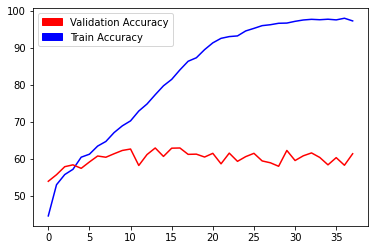

# Epoch : 38 /60
Valid_Prediction : [1 1 0 2 2 0 0 0 0 2 0 0 1 0 0 0 2 0 2 0 0 2 2 1 1 0 0 0 0 2 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 2 0 0 0 0 0 1 1 0 1 0 1 2 1 0 0 0 1 0 0 0 2 0 0 1 0 2 0 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 2 2 0 0 2 0 0 2 0 1 2 2 0 2 0 0 0 0 0 2 0 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 1 2 0 0 2 0 0 0 1 0 0 0 0 2 0 2 0 0 2 0 1 0 2 1 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 2 1 0 0 2 2 0 1 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

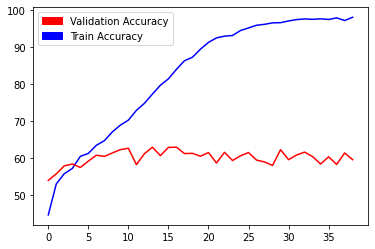

# Epoch : 39 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 2 0 0 0 0 1 1 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 0 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 0 1 2 0 2 0 0 2 0 1 2 2 0 0 1 0 0 0 2 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 0 0 2 0 2 0 0 0 0 2 0 0 0 0 1 1]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 2 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

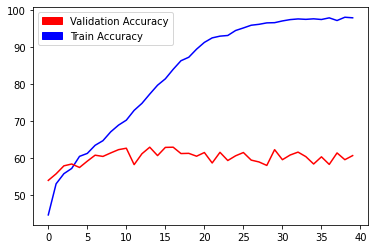

# Epoch : 40 /60
Valid_Prediction : [0 1 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 2 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 0 1 2 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 1 2 2 0 0 2 0 2 0 0 2 0 0 0 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 2 1 0 0 0 1 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

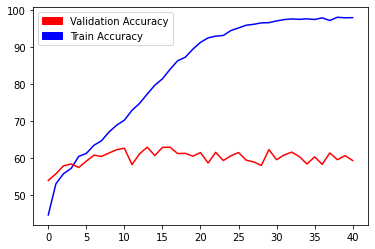

# Epoch : 41 /60
Valid_Prediction : [0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 1 0 1 0 0 0 2 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 0 0 0 0 2 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 2]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 0 1 0 0 2 0 0 0 0 2 0 0 2 2 2 2 0 1 2 1 0 2 2 2 0 0 1 2 1 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [0 1 0 1 2 1 2 1 2 0 2 1 0 0 0 0 1 1 0 0 0 0 2 0 2 0 0 2 0 0 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [2 0 0 0 1 0 0 1 0 2 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Valid_Prediction : [1 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 2 2 0 0 0 2 0]
Valid_Truth : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

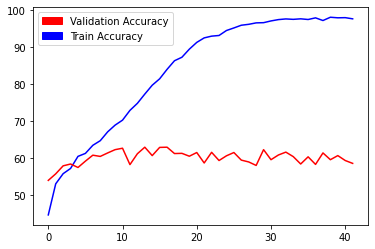

# Epoch : 42 /60


In [ ]:
# Learning
acc_t = []
acc_v = []
print('***START EPOCH***')

for epoch in range(60):
    print('# Epoch : {} /60'.format(epoch))
    train_img, pred_t, truth_t, accuracy_t, loss_t = run_train(model)
    valid_img, pred_v, truth_v, accuracy_v, loss_v = run_valid(model)
    #if epoch%4 == 0:
    print('Train Accuracy : {}'.format(accuracy_t))
    print('Validation Accuracy : {}'.format(accuracy_v))
    acc_t.append(accuracy_t)
    acc_v.append(accuracy_v)

    plt.plot(range(len(acc_t)), acc_t, 'b', range(len(acc_v)), acc_v, 'r')
    blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
    red_patch = mpatches.Patch(color='red', label='Validation Accuracy')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()

In [ ]:
# Save the weight matrices and bias vectors that will be loaded for testing later
torch.save(model,'/content/drive/MyDrive/FashionClassification/Model_TeamXX')